In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,ShuffleSplit,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection

In [57]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary","League","Division","NewLeague"],axis = 1).astype("float64")
X = pd.concat([X_,dms[["League_N","Division_W","NewLeague_N"]]],axis = 1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [3]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [4]:
from sklearn.tree import DecisionTreeRegressor
cart_model = DecisionTreeRegressor(max_leaf_nodes = 10)

In [5]:
cart_model 

DecisionTreeRegressor(max_leaf_nodes=10)

In [6]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=10)

Text(0, 0.5, 'Maaş(Salary)')

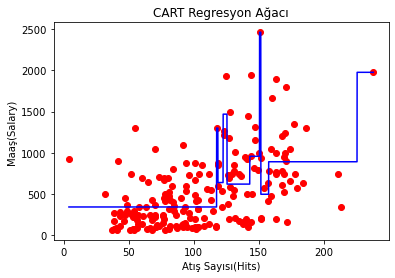

In [7]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)),0.01)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(X_train,y_train,color = "red")
plt.plot(X_grid,cart_model.predict(X_grid),color = "blue")
plt.title("CART Regresyon Ağacı")
plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş(Salary)")

In [8]:
pip install SKompiler[full]

Note: you may need to restart the kernel to use updated packages.


In [9]:
from skompiler import skompile

In [10]:
print(skompile(cart_model.predict).to('python/code'))

(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



# Model Tahmin

In [11]:
x = [91]
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else 
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else 
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <= 
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <= 
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)



345.2011551724138

In [12]:
cart_model.predict(X_test)[0:5]

array([621.96792308, 958.61111111, 621.96792308, 345.20115517,
       345.20115517])

In [13]:
cart_model.predict([[91]])

array([345.20115517])

In [14]:
y_pred = cart_model.predict(X_test)

In [16]:
np.sqrt(mean_squared_error(y_test,y_pred))

486.34593105235456

# Model Tuning

In [58]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train,y_train)
y_pred = cart_model.predict(X_test)

In [59]:
np.sqrt(mean_squared_error(y_test,y_pred))

568.3000777504093

In [60]:
cart_params = {"min_samples_split":range(2,100),
         "max_leaf_nodes":range(2,10)}

In [61]:
cart_cv_model = GridSearchCV(cart_model,cart_params,cv = 10)
cart_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [62]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 37}

In [67]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9,min_samples_split = 37)

In [68]:
cart_tuned.fit(X_train,y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [69]:
y_pred = cart_tuned.predict(X_test)

In [70]:
np.sqrt(mean_squared_error(y_test,y_pred))

376.3978820710986